In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
#Importing the dataset and viewing details

df = pd.read_csv('C:/Users/navee/Downloads/ML/CSV/CSV Files/owid-covid-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376708 entries, 0 to 376707
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    376708 non-null  object 
 1   continent                                   358744 non-null  object 
 2   location                                    376708 non-null  object 
 3   date                                        376708 non-null  object 
 4   total_cases                                 338085 non-null  float64
 5   new_cases                                   366116 non-null  float64
 6   new_cases_smoothed                          364886 non-null  float64
 7   total_deaths                                316113 non-null  float64
 8   new_deaths                                  366124 non-null  float64
 9   new_deaths_smoothed                         364894 non-null  float64
 

In [3]:
#Dealing with Null values

df.fillna(0, inplace=True)

In [4]:
#Filtering and obtaining Total covid cases in India over the years

df1 = df[['date','new_cases']].loc[df['location'] == 'India']
df1['date'] = pd.to_datetime(df1['date'])

df1 = df1.groupby(pd.Grouper(key='date', axis=0, freq='1Q', sort=True)).sum().reset_index()
df1.head(2)

,date,new_cases
0,2020-03-31,979.0
1,2020-06-30,527880.0


In [5]:
#Filtering and obtaining Total covid cases in Japan over the years

df2 = df[['date','new_cases']].loc[df['location'] == 'Japan']
df2['date'] = pd.to_datetime(df2['date'])

df2 = df2.groupby(pd.Grouper(key='date', axis=0, freq='1Q', sort=True)).sum().reset_index()
df2.head(2)

,date,new_cases
0,2020-03-31,1693.0
1,2020-06-30,16697.0


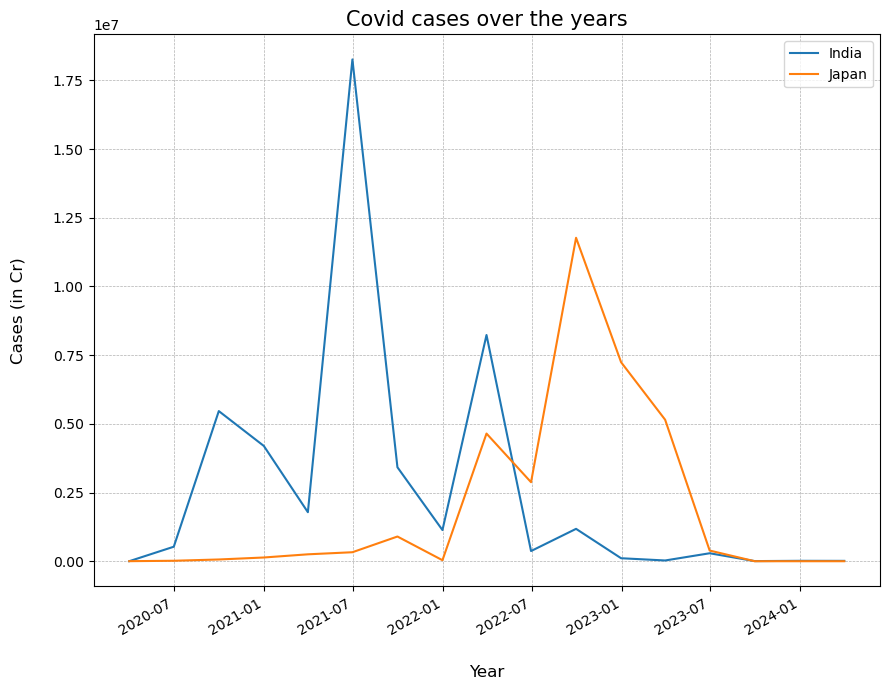

In [6]:
#Plotting a Line chart to observe Covid case trend in India and Japan over the years

plt.rcdefaults()
fig, ax = plt.subplots(figsize = (9,7))

ax.plot(df1.date,df1.new_cases)
ax.plot(df2.date,df2.new_cases)

ax.set_title('Covid cases over the years', fontsize = 15)
ax.legend(['India','Japan'])
ax.xaxis.set_label_text('Year', fontsize = 12)
ax.yaxis.set_label_text('Cases (in Cr)', fontsize = 12)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 20

fig.tight_layout()

plt.show()

In [7]:
#Finding out countries with most mortality rate in % (Per 100k people)

df3 = df.groupby(['location','population'], as_index=False)['total_deaths'].max().sort_values('total_deaths', ascending = False)

df3['population/100k'] = df3['population']/100
df3['deaths/100k'] = df3['total_deaths']/(df3['population']/100)
df3['mortality_rate'] = (df3['deaths/100k']*100).round(2)

df3 = df3.sort_values('mortality_rate',ascending = False).head(10)
df3

,location,population,total_deaths,population/100k,deaths/100k,mortality_rate
177,Peru,34049588.0,221583.0,340495.88,0.650766,65.08
33,Bulgaria,6781955.0,38681.0,67819.55,0.570352,57.04
28,Bosnia and Herzegovina,3233530.0,16382.0,32335.30,0.506629,50.66
99,Hungary,9967304.0,49022.0,99673.04,0.491828,49.18
164,North Macedonia,2093606.0,9968.0,20936.06,0.476116,47.61
207,Slovenia,2119843.0,9957.0,21198.43,0.469705,46.97
51,Croatia,4030361.0,18687.0,40303.61,0.463656,46.37
81,Georgia,3744385.0,17132.0,37443.85,0.457538,45.75
147,Montenegro,627082.0,2654.0,6270.82,0.423230,42.32
55,Czechia,10493990.0,43478.0,104939.90,0.414313,41.43


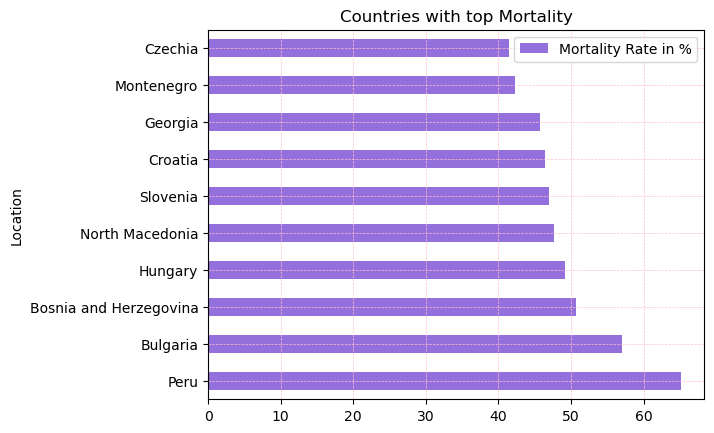

In [26]:
#Plotting the countries with top mortality

plt.style.use("seaborn-v0_8")
plt.rcdefaults()
df3.plot.barh(x = 'location', y = 'mortality_rate', color='mediumpurple')
plt.title("Countries with top Mortality")
plt.legend(['Mortality Rate in %']);
plt.ylabel('Location')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color = 'pink')

ax.yaxis.labelpad = 20

In [9]:
#Identifying vaccination percentage of top populated locations

df4 = df.groupby(['location','population'], 
                 as_index=False)['people_fully_vaccinated'].max().sort_values('population', ascending = False)
df4['vaccination_percentage'] = (df4['people_fully_vaccinated']/df4['population'])*100
df4.head(10)

,location,population,people_fully_vaccinated,vaccination_percentage
251,World,7.975105e+09,5.176858e+09,64.912730
12,Asia,4.721383e+09,3.461821e+09,73.322174
128,Lower middle income,3.432097e+09,2.052419e+09,59.800721
241,Upper middle income,2.525921e+09,1.990461e+09,78.801389
1,Africa,1.426737e+09,4.623922e+08,32.409080
44,China,1.425887e+09,1.276760e+09,89.541435
101,India,1.417173e+09,9.519883e+08,67.175158
96,High income,1.250515e+09,9.292546e+08,74.309776
70,Europe,7.448078e+08,4.931631e+08,66.213477
127,Low income,7.376049e+08,2.046884e+08,27.750413


In [10]:
#Removing irrelevant fields by index

df5 = df4.drop([251,12,241,128,96,127,71])
df5 = df5.head(10)
df5.head(10)

,location,population,people_fully_vaccinated,vaccination_percentage
1,Africa,1.426737e+09,4.623922e+08,32.409080
44,China,1.425887e+09,1.276760e+09,89.541435
101,India,1.417173e+09,9.519883e+08,67.175158
70,Europe,7.448078e+08,4.931631e+08,66.213477
162,North America,6.003237e+08,3.944755e+08,65.710477
211,South America,4.368167e+08,3.369336e+08,77.133872
239,United States,3.382899e+08,2.306373e+08,68.177435
102,Indonesia,2.755013e+08,1.749651e+08,63.507907
171,Pakistan,2.358249e+08,1.404759e+08,59.567880
160,Nigeria,2.185412e+08,8.129781e+07,37.200218


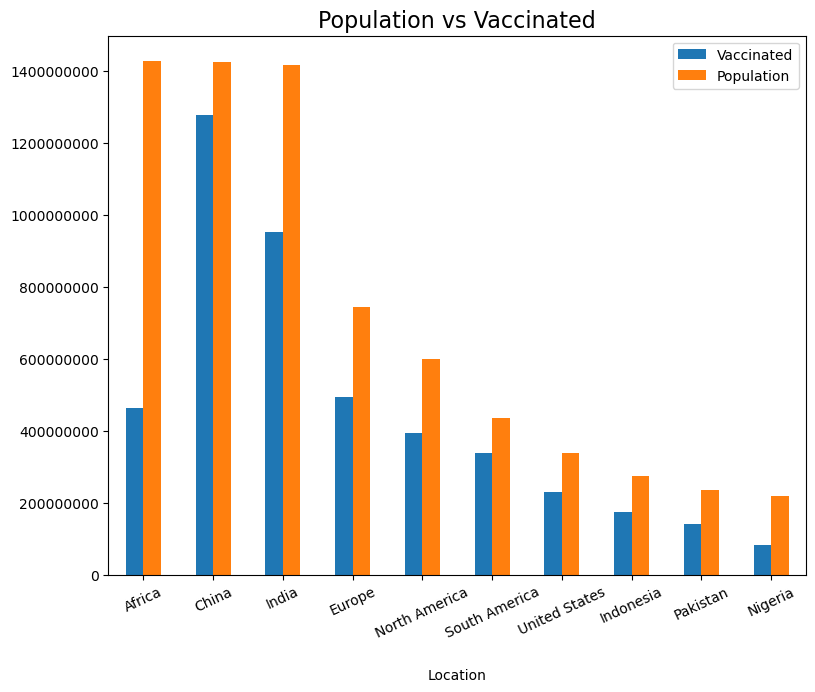

In [14]:
#Plotting Ratio of Population vs Vaccinated people

plt.style.use("seaborn-v0_8")
plt.rcdefaults()

fig, ax = plt.subplots(figsize = (9,7))
plt.ticklabel_format(style = 'plain')
df5.plot.bar(x = 'location', y = ['people_fully_vaccinated', 'population'], rot = 25, ax = ax)
ax.set_title("Population vs Vaccinated", fontsize = 16)
ax.set( xlabel = "Location");
plt.legend(['Vaccinated','Population']);
ax.xaxis.labelpad = 20



In [12]:
#Countries with higher likelihood of mortality if disease is contracted (in %)

df6 = df.groupby(['location'], as_index=False)[['total_cases','total_deaths']].max().sort_values('total_deaths', ascending = False)


df6['mortality_likelihood'] = (df6['total_deaths']/df6['total_cases'])*100

df6 = df6.sort_values('mortality_likelihood',ascending = False).head(10)
df6.head(5)

,location,total_cases,total_deaths,mortality_likelihood
252,Yemen,11945.0,2159.0,18.074508
216,Sudan,63993.0,5046.0,7.885237
220,Syria,57423.0,3163.0,5.508246
209,Somalia,27334.0,1361.0,4.979147
177,Peru,4536733.0,221583.0,4.884198
